In [662]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline 

# part A : load image

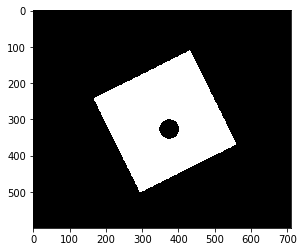

In [664]:
image = cv.imread("resources/hole.jpg")
_, image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)
plt.imshow(image)

# part A : kernel construction

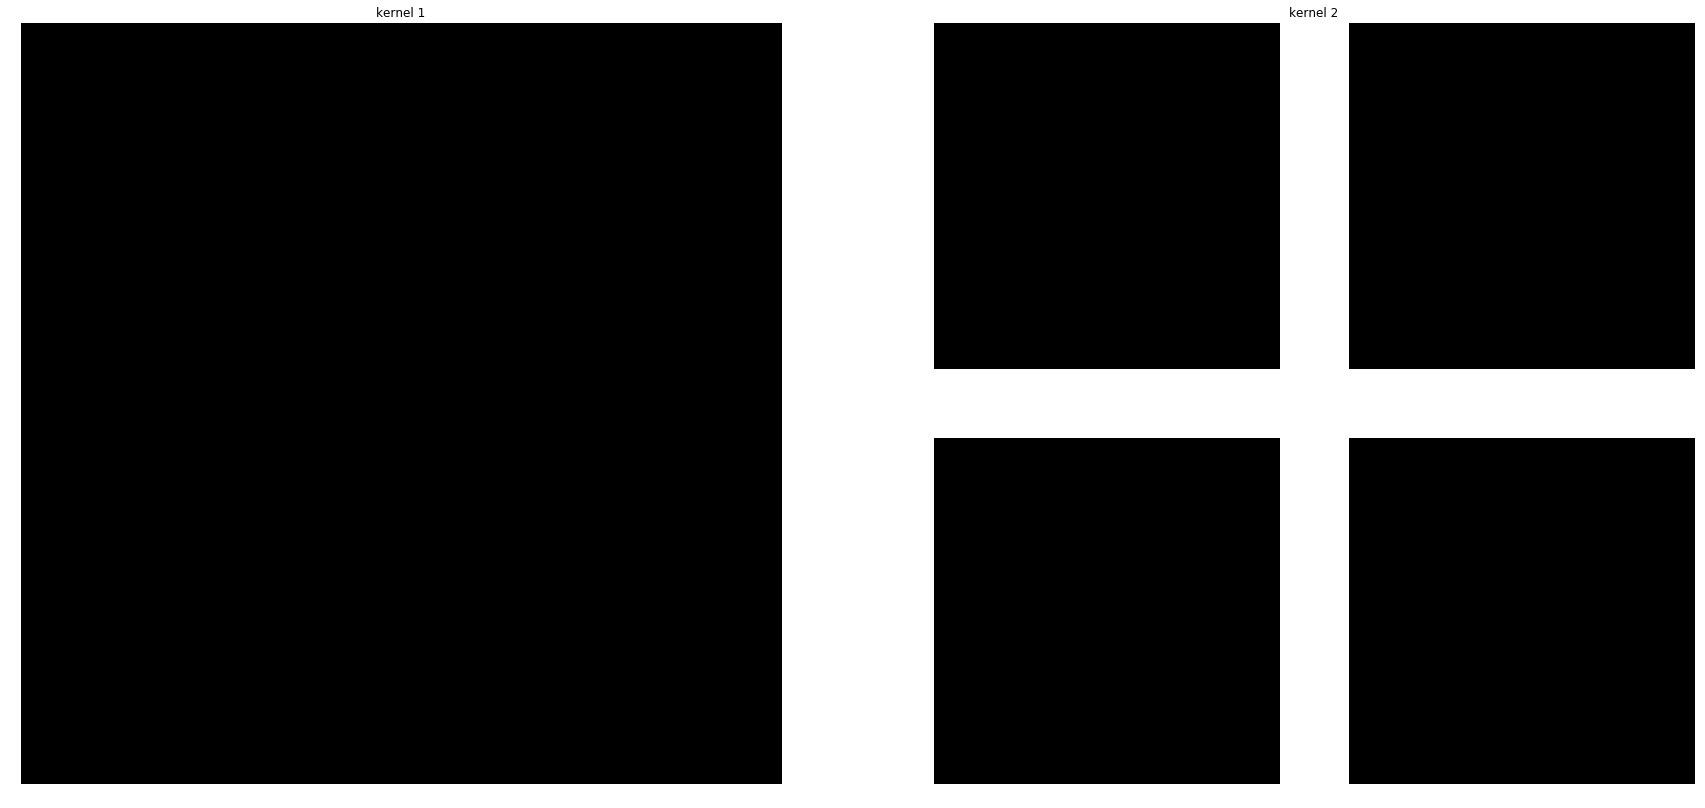

In [666]:
kernel1 = np.ones((10,10), np.uint8)
kernel2 = np.zeros((11,11), np.uint8)
for i in range(11):
    kernel2[i, 5] = 1
    kernel2[5,i] = 1
fig, axs = plt.subplots(1 , 2, figsize = (30, 30))
for i in axs:
    i.axis("off")
 
axs[0].set_title("kernel 1")
axs[1].set_title("kernel 2")

axs[0].imshow(kernel1, cmap = "gray")
axs[1].imshow(kernel2, cmap = "gray")

plt.show()



# Part A: erosion and dilation

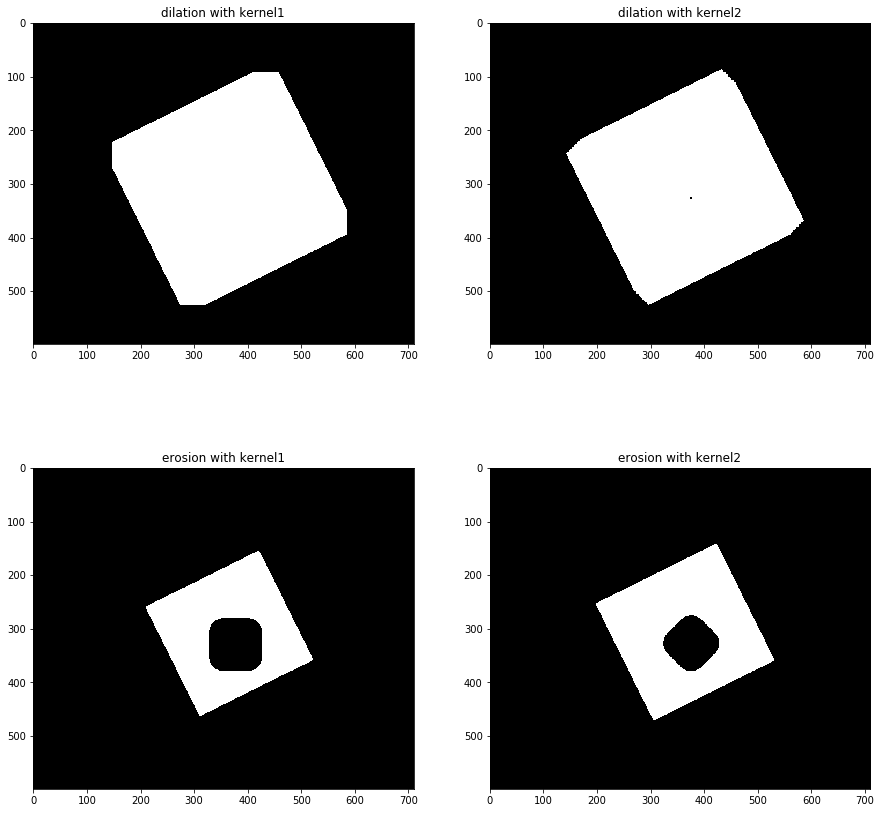

In [667]:
dilation1 = cv.dilate(image, kernel1, iterations = 5)
erosion1 = cv.erode(image, kernel1, iterations = 5)

dilation2 = cv.dilate(image, kernel2, iterations = 5)
erosion2 = cv.erode(image, kernel2, iterations = 5)

fig, axs = plt.subplots(2, 2, figsize = (15,15))

axs[0][0].set_title("dilation with kernel1")
axs[1][0].set_title("erosion with kernel1")

axs[0][1].set_title("dilation with kernel2")
axs[1][1].set_title("erosion with kernel2")

axs[0][0].imshow(dilation1, cmap = "gray")
axs[1][0].imshow(erosion1, cmap = "gray")

axs[0][1].imshow(dilation2, cmap = "gray")
axs[1][1].imshow(erosion2, cmap = "gray")

# Part A: closing and opening

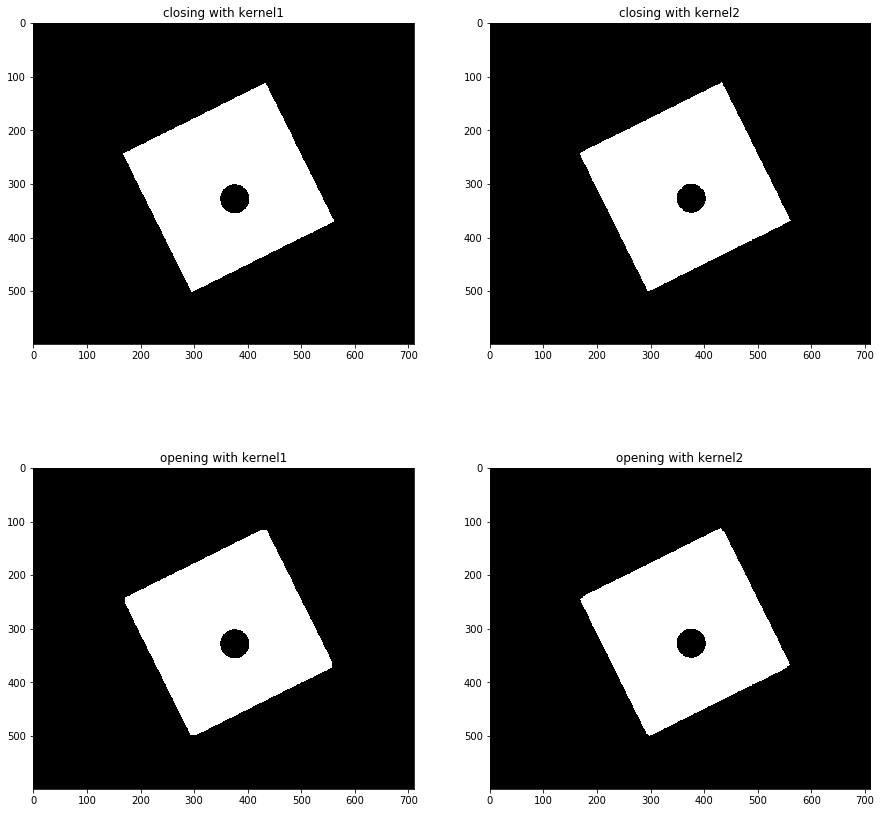

In [670]:
closing1 = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel1)
opening1 = cv.morphologyEx(image, cv.MORPH_OPEN, kernel1)

closing2 = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel2)
opening2 = cv.morphologyEx(image, cv.MORPH_OPEN, kernel2)

fig, axs = plt.subplots(2, 2, figsize = (15,15))

axs[0][0].set_title("closing with kernel1")
axs[1][0].set_title("opening with kernel1")

axs[0][1].set_title("closing with kernel2")
axs[1][1].set_title("opening with kernel2")

axs[0][0].imshow(closing1, cmap = "gray")
axs[1][0].imshow(opening1, cmap = "gray")

axs[0][1].imshow(closing2, cmap = "gray")
axs[1][1].imshow(opening2, cmap = "gray")

# Part A: hole filling

for this purpose I have used closing with a structuring element which is a 50 x 50 square

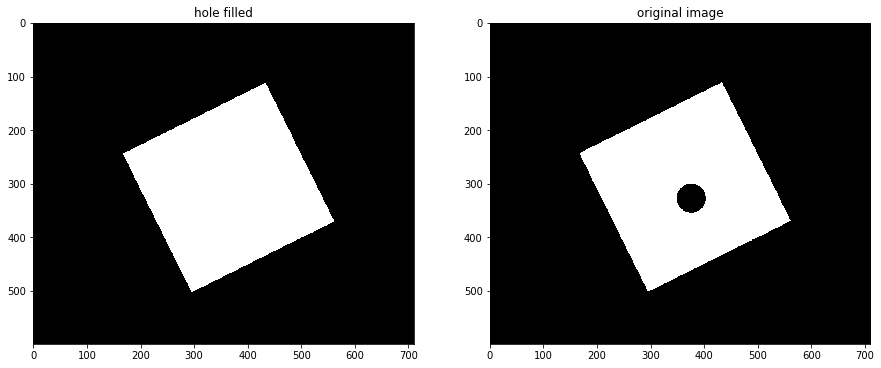

In [673]:
kernel = np.ones((50,50), np.uint8)
closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(1, 2, figsize = (15,15))
axs[0].set_title("hole filled")
axs[1].set_title("original image")
axs[0].imshow(closing)
axs[1].imshow(image)

# Part B: noise removal

we use an opening followed by a closing with a square shaped structuring element

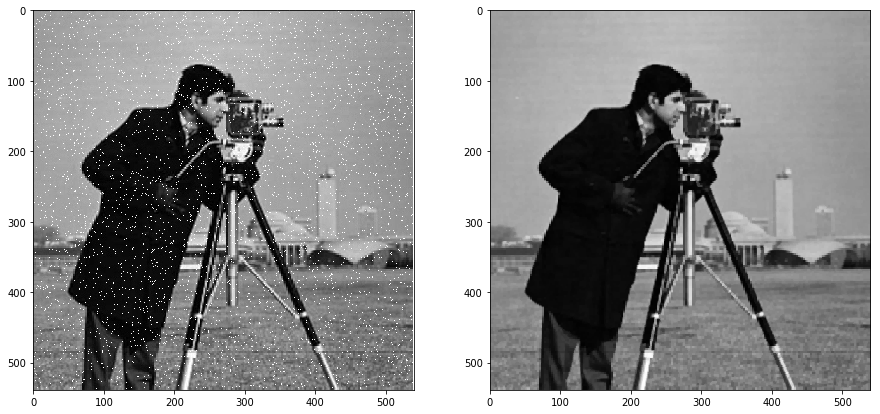

In [674]:
kernel = np.ones((3,3), np.uint8)
image = cv.imread("resources/noisycameraman.jpg", cv.IMREAD_GRAYSCALE)
opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(1, 2, figsize = (15,15))
axs[0].imshow(image, cmap = "gray")
axs[1].imshow(closing, cmap = "gray")



# Part C: image loading

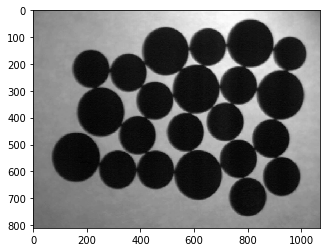

In [677]:
image = cv.imread("resources/circles.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = "gray")

# Part C: histogram

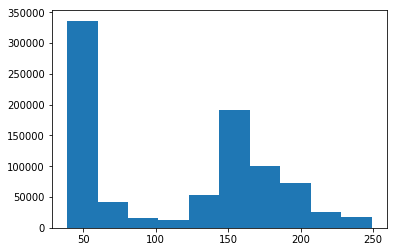

In [678]:
plt.hist(image.ravel())
plt.show()

# Part C: Thresholding

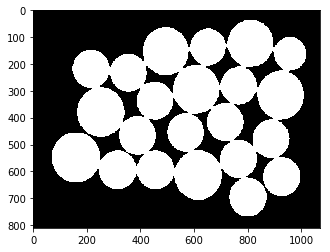

In [687]:
thresh_image = np.ones((image.shape[0], image.shape[1]))

thresh_image[image > 120] = 0
plt.imshow(thresh_image, cmap = "gray")

# Part C: filterning

I have used a circular structuring element and have performed an erosiong to seperate the circles. since some artifacts appear after erosion, I have combined it with two openings with the same structuring element. As you can observe, the circles are cleanly seperated.

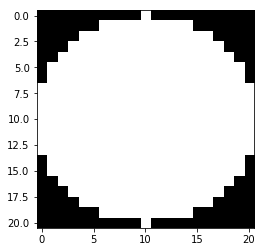

In [688]:
ksize = 21
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (ksize, ksize))
plt.imshow(kernel, cmap = "gray")


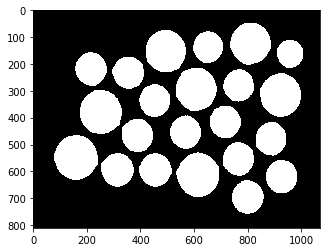

In [689]:
thresh_image = cv.morphologyEx(thresh_image, cv.MORPH_ERODE, kernel)
thresh_image = cv.morphologyEx(thresh_image, cv.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(thresh_image, cmap = "gray")

# Part D: image loading

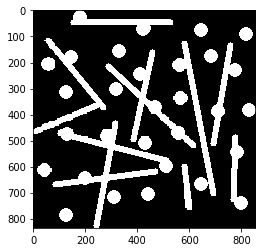

In [702]:
image = cv.imread("resources/lines_circles.jpg", cv.IMREAD_GRAYSCALE)
_, image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)
plt.imshow(image, cmap = "gray")


# Part D: filtering the lines

I have used a circle from the image itself as the structuring element and I have resized it to a smaller circle to perform operations better. because the diameter of the circles are larger than diameters of the lines, the lines will be removed and the circles will remain in the picture. I used an opening followed by a closing and I have treated the lines as if they were noise. then to remove artifacts that still remaing in the image, I have repeated the same procedure, but with a smaller structuring element.

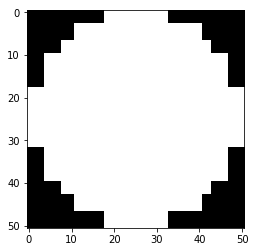

In [703]:
s_element = image[49:103, 615:669]
s_element = cv.resize(s_element, (51,51))
_, s_element = cv.threshold(s_element, 128, 255, cv.THRESH_BINARY)
plt.imshow(s_element, cmap = "gray")



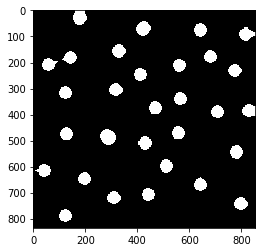

In [704]:
transformed = cv.morphologyEx(image, cv.MORPH_OPEN, s_element)
transformed = cv.morphologyEx(transformed, cv.MORPH_CLOSE, s_element)
plt.imshow(transformed, cmap = "gray")

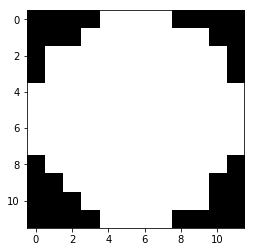

In [705]:
s_element2 = cv.resize(s_element, (12,12))
_, s_element2 = cv.threshold(s_element2, 128, 255, cv.THRESH_BINARY)
plt.imshow(s_element2, cmap = "gray")

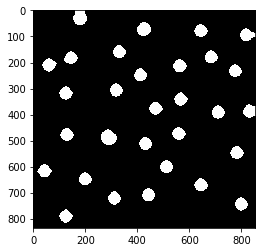

In [706]:
smooth = cv.morphologyEx(transformed, cv.MORPH_OPEN, s_element2)
smooth = cv.morphologyEx(smooth, cv.MORPH_CLOSE, s_element2)
plt.imshow(smooth, cmap = "gray")

# Part D: cirlce filtering

for this part I used the circles image I obtained in the previous part and subtracted the original image with that one. because the lines and circles have intersections, clearly this was not a good idea. to fill the gaps and artifacts which are formed by the circles, I have used some morphological operations which yield a better result.

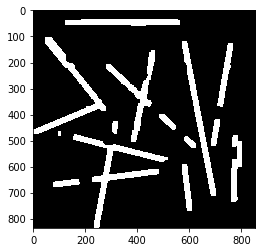

In [776]:
just_circles = np.copy(smooth)
circle_pos = np.where(just_circles == 255)
just_lines = np.copy(image)
just_lines[circle_pos] = 0

s_element = np.ones((7,7))
just_lines = cv.morphologyEx(just_lines, cv.MORPH_OPEN, s_element)
just_lines = cv.morphologyEx(just_lines, cv.MORPH_CLOSE, s_element)

#it is probably possible to do the following for every line. i.e. use a structuring element in the form of a line
#directed in the angle of each line and use it on the line to fill the gaps, formed by the absence of the circles. but this would
#be very cumbersome and probably not the best idea.
s_element = np.ones((3,50))
just_lines[0:100,:] = cv.morphologyEx(just_lines[0:100,:], cv.MORPH_DILATE, s_element, iterations = 1)

s_element = np.ones((5,5))
just_lines[100:220, 0:200] = cv.morphologyEx(just_lines[100:220, 0:200], cv.MORPH_DILATE, s_element, iterations = 1)

s_element = np.ones((5,5))
just_lines[100:220, 0:200] = cv.morphologyEx(just_lines[100:220, 0:200], cv.MORPH_DILATE, s_element, iterations = 1)

s_element = cv.getStructuringElement(cv.MORPH_RECT, (30, 100))
just_lines[500:600, 780:800] = cv.morphologyEx(just_lines[500:600, 780:800], cv.MORPH_DILATE, s_element, iterations =2)

s_element = np.ones((10,10))
just_lines = cv.morphologyEx(just_lines, cv.MORPH_OPEN, s_element, iterations = 1)


plt.imshow(just_lines, cmap = "gray")


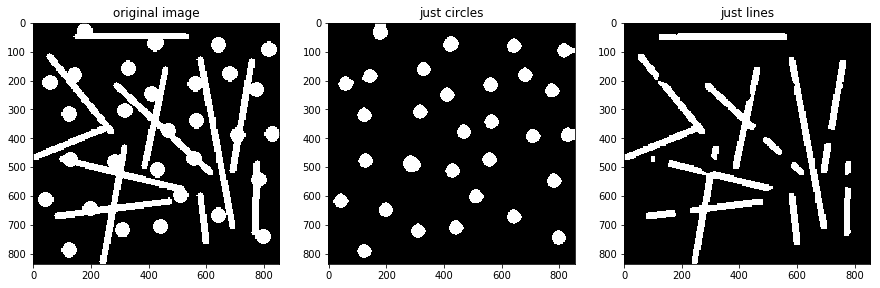

In [701]:
fig, axs = plt.subplots(1, 3, figsize = (15,15))
axs[0].set_title("original image")
axs[1].set_title("just circles")
axs[2].set_title("just lines")

axs[0].imshow(image, cmap = "gray")
axs[1].imshow(just_circles, cmap = "gray")
axs[2].imshow(just_lines, cmap = "gray")
